## MODELO: Regresión Lineal
- Predecir el precio del inmueble según el **m^2** ingresado por el agende inmobiliario.

## NOTACIONES:

| NOTACIÓN   | DESCRIPCION | PYTHON |
| -------------------| ------------------------ | ------------------------ |
| $x$              | Equivalente al tamaño del inmueble **(m^2)**                    | x_train                      |
| $y$               | Equivalente al precio en $ de 1000                      | y_train                      |
| $x(i),y(i)$               | Entrenamiento equivalente a las notaciones de **(x / y)**                     | x_i, y_i                      |
| $m$               | Números de entrenamiento                      | m                      |
| $w$               | Asignar valor o peso de predicción  **(weight)**                    | x(w)                      |
| $b$               | Ajustar la predicción **(bias)**                     | +(b)                      |
| $f_{w,b}(x^{(i)})$             | Resultado de modelo segun aprendizaje del entrenamiento. Apply formula $f_{w,b}(x^{(i)}) = wx^{(i)}+b$                      | f_wb                      |

### Celda #1
- Importar librerias
- Import libraries

In [11]:
# libraries import
import numpy as np
import matplotlib.pyplot as plt
from utils import *
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

### Celda #2 - Dataset
- Descripción: crear variables de entrenamiento y almacenamiento la data en un array unidimensinal de NumPy
- Description: create training variables and store the data in a one-dimensional NumPy array

In [12]:
# load data
x_train, y_train = load_data() # 100 rows for training
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [ 15.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  32.  34.  36.  38.  40.  42.  43.  44.  45.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  64.  66.  68.  69.
  70.  72.  74.  76.  78.  80.  82.  84.  88.  90.  94.  96. 100. 105.
 110. 112. 115. 117. 118. 119. 120. 125. 130. 140. 145. 150. 155. 165.
 168. 170. 175. 178. 180. 181. 182. 183. 184. 185. 186. 187. 190. 195.
 200. 205. 210. 215. 218. 220. 224. 226. 225. 228. 230. 232. 237. 238.
 240. 245.]
y_train = [ 15000.    15180.    15362.16  15546.51  30000.    30360.    30724.32
  31093.01  31466.13  36000.    36432.    36869.18  37311.61  37759.35
  45000.    45540.    46086.48  46639.52  47199.19  55000.    55660.
  56327.92  57003.86  61000.    61732.    62472.78  63222.46  70000.
  70840.    71690.08  72550.36  73420.97  75000.    75900.    76810.8
  77732.53  78665.32  80000.    80960.    81931.52  82914.7   83909.67
  86000.    87032.    88076.38  89133.3   90202.9 

### Celda #3 - Number of training
- Número de entrenamiento 
- Number training

In [13]:
m = len(x_train)
print(f"Numbero de entrenamiento: {m}")

Numbero de entrenamiento: 100


### Celda #4: Apply training
- Aplicar entrenamiento, iniciar índice 0
- Apply training, start index 0

In [42]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (15.0, 15000.0)


### Celda #5: Plotting the data (point x)
- Trazando los datos con matplotlib
- Plotting the data with matplotlib

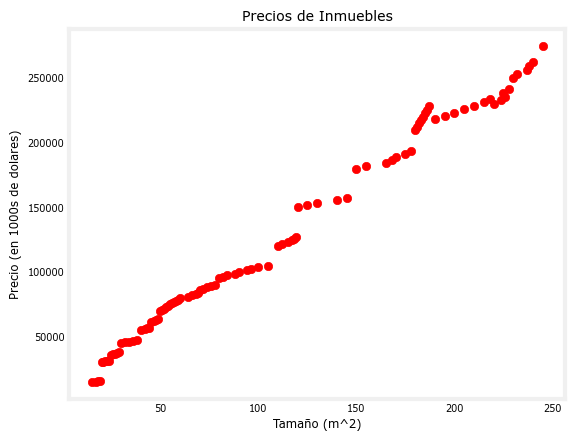

In [43]:
# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='r')
# Set the title
plt.title("Precios de Inmuebles")
# Set the y-axis label
plt.ylabel('Precio (en 1000s de dolares)')
# Set the x-axis label
plt.xlabel('Tamaño (m^2)')
plt.show()

### Celda #6: Assign value the parameters w / b
- Asignar valor al párametro **(w)** de predicción y asignar filtro incial al parametro **(b)** de predicción.
- Assign value to the prediction parameter **(w)** and assign initial filter to prediction parameter **(b)**

In [44]:
w = 1200
b = 300
print(f"w: {w}")
print(f"b: {b}")

w: 1200
b: 300


### Celda #7: Implement function applying formula $f_{w,b}(x^{(i)}) = wx^{(i)}+b$
- Implementar la función compute_model_output para calcular la salida de los datos procesados.
- Implement the compute_model_output function for calculate the output processed data.

In [45]:
def compute_model_output(x, w, b):    
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

### Celda #8: Plot the output with matplotlib (graph line: blue prediction, read: values x / y)
- Trazar la salida con matplotlib invocando a la función compute_model_output
- Plot the output with matplotlib calling the compute_model_output function

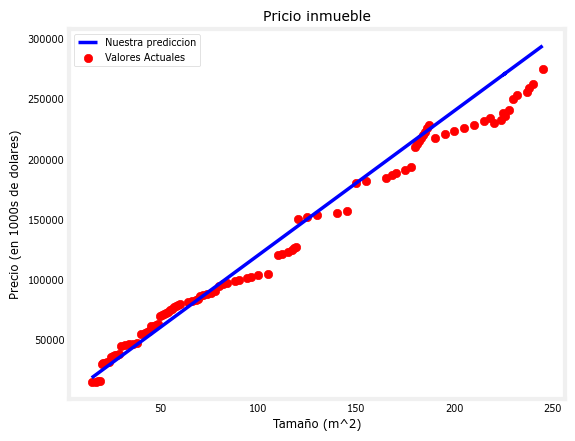

In [46]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Nuestra prediccion')
# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='r',label='Valores Actuales')

# Set the title
plt.title("Pricio inmueble")
# Set the y-axis label
plt.ylabel('Precio (en 1000s de dolares)')
# Set the x-axis label
plt.xlabel('Tamaño (m^2)')
plt.legend()
plt.show()

### Celda #8: Predict the price of houses according to size in m^2
- Con el modelo construido, vamos a predecir el precio de una casa m^2 (cuadrados)
- With model built, let's predict the price of a house m^2 (sq).

In [47]:
def costInmueble(m_2):
    #w = 1100
    w = 1200
    b = 300 
    x_i = m_2 #round(mts_pies(m_2)/ 1000,3)    
    cost_in_mt2 = w * x_i + b        
    return f"Inmueble valorizado en $ {format(cost_in_mt2, '0,.2f')} dolares, con un tamaño de {m_2:.0f} m^2"

In [48]:
costInmueble(90)

'Inmueble valorizado en $ 108,300.00 dolares, con un tamaño de 90 m^2'